In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

In [48]:
# read dataset
df = pd.read_csv("litres_dataset.csv", delimiter=',')

### 1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?

In [49]:
df.head(5)

,name,authors,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year
0,Изучаем DDD – предметно-ориентированное проект...,['Влад Хононов'],/book/vlad-hononov/izuchaem-ddd-predmetno-orie...,0.00,0,1,319,549.0,"['<p>Эта книга из той лиги, в которой я пока н...",0,2022-01-01
1,Начинаем программировать на Python,['Тони Гэддис'],/book/toni-geddis-32491161/nachinaem-programmi...,4.94,16,6,875,599.0,['<p>Шикарная книга! Начал изучать Python само...,12,2021-01-01
2,Высоконагруженные приложения. Программирование...,['Мартин Клеппман'],/book/martin-kleppman-1733/vysokonagruzhennye-...,3.98,51,11,640,799.0,"['<p>Не могу что-либо про перевод сказать, чит...",16,2017-01-01
3,System Design. Подготовка к сложному интервью,['Алекс Сюй'],/book/aleks-suy/system-design-podgotovka-k-slo...,3.59,17,9,304,699.0,['<p>Добротная книга по разработке архитектуры...,16,2020-01-01
4,Нейросети начало,['Джейд Картер'],/book/dzheyd-karter/neyroseti-nachalo-69188950/,4.87,433,37,102,690.0,['<p>Книга отличная. Давно хотела понять как в...,12,2023-04-19


In [50]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {cols}')


Number of Rows: 2740
Number of Columns: 11


### 2. Есть ли в датасете пропуски? (0.5)

In [51]:
total_missing_values = df.isnull().sum().sum()
print(f'Total missing values: {total_missing_values}')

missing_values_per_column = df.isnull().sum()
columns_with_missing_data = missing_values_per_column[missing_values_per_column > 0].index.tolist()
print(f'Columns with missing data: {columns_with_missing_data}')

Total missing values: 646
Columns with missing data: ['price', 'year']


### 3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).

In [52]:
print(f'Data types {df.dtypes}')

Data types name             object
authors          object
link             object
rating          float64
rating_count      int64
review_count      int64
pages_count       int64
price           float64
text_reviews     object
age               int64
year             object
dtype: object


### 4. Выведите описательные статистики переменных. Ответьте на следующие вопросы: Какая медианная цена книги в вашем датасете? (1)

In [53]:
price_non_null = df['price'].dropna()
median_price_non_null = price_non_null.median()
print(f'Book median price: {median_price_non_null}')


Book median price: 399.0


### 5. Какое возрастное ограничение встречается чаще всего? (1)

In [54]:
print(f'Most frequent age restriction: {df.age.mode().values}')


Most frequent age restriction: [0]


### 6. Какое среднее число отзывов в книге? (1)




In [55]:
print(f'Average reviews count: {df.review_count.mean()}')

Average reviews count: 1.1843065693430657


### 7. Сколько книг имеют оценку ниже 4.25? (1)

In [56]:
df_rating = df[df.rating < 4.25]
print(f'Amount of books with rating < 4.25: {df_rating.size}')

Amount of books with rating < 4.25: 21593


### 8. В каком году было написано больше всего книг из датасета? (1)

In [57]:
df['year'] = df['year'].str.split('-').str[0]
print(f'Most frequent year: {df.year.mode().values}')

Most frequent year: ['2021']


### 9. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

In [58]:
def is_popular(row):
    if row['rating'] >= 4.6 and row['review_count'] >= 5:
        return 1
    return 0
df['is_popular'] = df.apply(is_popular, axis=1)
popular_books = df[df.is_popular == 1]
popular_books.head()


,name,authors,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year,is_popular
1,Начинаем программировать на Python,['Тони Гэддис'],/book/toni-geddis-32491161/nachinaem-programmi...,4.94,16,6,875,599.0,['<p>Шикарная книга! Начал изучать Python само...,12,2021,1
4,Нейросети начало,['Джейд Картер'],/book/dzheyd-karter/neyroseti-nachalo-69188950/,4.87,433,37,102,690.0,['<p>Книга отличная. Давно хотела понять как в...,12,2023,1
5,Python Библиотеки,['Джейд Картер'],/book/dzheyd-karter/python-biblioteki-70323379/,4.97,339,11,192,690.0,['<p>На каждую библиотеку в книге приводится п...,12,2024,1
10,Go. Идиомы и паттерны проектирования (pdf + epub),['Джон Боднер'],/book/dzhon-bodner/go-idiomy-i-patterny-proekt...,5.00,7,5,416,699.0,"['<p>Странно, что у этой книги нет отзывов. Да...",16,2021,1
13,Создай свой VPN. Безопасное использование инте...,['Джейд Картер'],/book/dzheyd-karter/sozday-svoy-vpn-bezopasnoe...,4.98,240,8,280,690.0,['<p>Нашел в книге решение своей ошибки. В общ...,12,2024,1


### 10. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

In [59]:
popular_books = df[df.is_popular == 1]
not_popular_books = df[df.is_popular == 0]
print(f'Popular books average pages count: {popular_books.pages_count.mean()}')
print(f'Not popular books average pages count: {not_popular_books.pages_count.mean()}')


Popular books average pages count: 347.8235294117647
Not popular books average pages count: 328.91130820399115


### 11. Выведите топ-10 книг по числу отзывов. (2).

In [60]:
df_sorted = df.sort_values('review_count', ascending=False)
df_sorted[['review_count', 'name', 'link']].head(10)

,review_count,name,link
432,41,Оптимизация в Python,/book/dzheyd-karter/optimizaciya-v-python-6998...
4,37,Нейросети начало,/book/dzheyd-karter/neyroseti-nachalo-69188950/
196,30,Психбольница в руках пациентов. Алан Купер об ...,/book/alan-kuper/psihbolnica-v-rukah-pacientov...
112,28,Теоретический минимум по Computer Science. Все...,/book/vladston-ferreyra-fi/teoreticheskiy-mini...
318,27,Идеальный программист. Как стать профессионало...,/book/robert-s-martin/idealnyy-programmist-kak...
459,27,"Говорят, в IT много платят. Как построить успе...",/book/elena-pravdina-25436/govoryat-v-it-mnogo...
137,25,#Сам себе программист. Как научиться программи...,/book/kori-althoff/sam-sebe-programmist-kak-na...
399,25,Базовые знания тестировщика веб-приложений,/book/vadim-ohapkin/bazovye-znaniya-testirovsc...
37,24,Сделай видеоигру один и не свихнись,/book/slava-gris/sdelay-videoigru-odin-i-ne-sv...
54,23,Как пасти котов. Наставление для программистов...,/book/dzh-hank-reynvoter/kak-pasti-kotov-nasta...


### 12. Найдите среднюю длину отзыва (в символах). (2)

(Из отзывов не убирались html теги)

In [61]:
df['text_reviews'] = df['text_reviews'].apply(literal_eval)
def get_avg_len(row):
    reviews = row['text_reviews']
    if not reviews:
        return 0
    sum_len = sum([len(review) for review in reviews])
    return sum_len / len(reviews)

df['avg_review_len'] = df.apply(get_avg_len, axis=1)
print(f'Average review lenght: {df.avg_review_len.mean()}')

Average review lenght: 146.5824945210664


### 13. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

Видна высокая корреляция review_count и rating_count

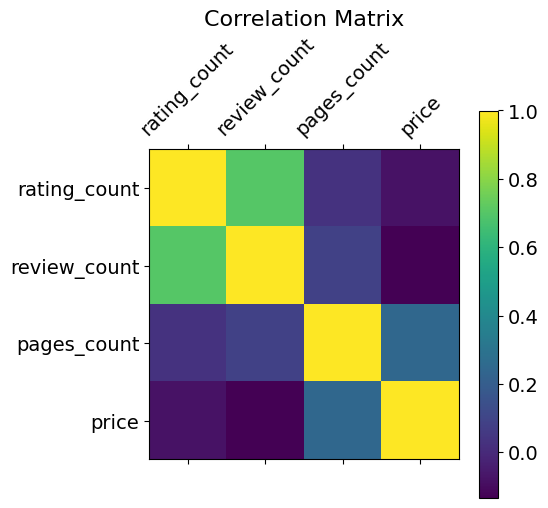

In [62]:
df_for_corr = df[['rating_count','review_count', 'pages_count', 'price']]
corr = df_for_corr[['rating_count','review_count', 'pages_count', 'price']].corr()
f = plt.figure(figsize=(5, 5))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df_for_corr.select_dtypes(['number']).shape[1]), df_for_corr.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_for_corr.select_dtypes(['number']).shape[1]), df_for_corr.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### 14. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. 

Чем больше страниц - тем меньше отзывов :)

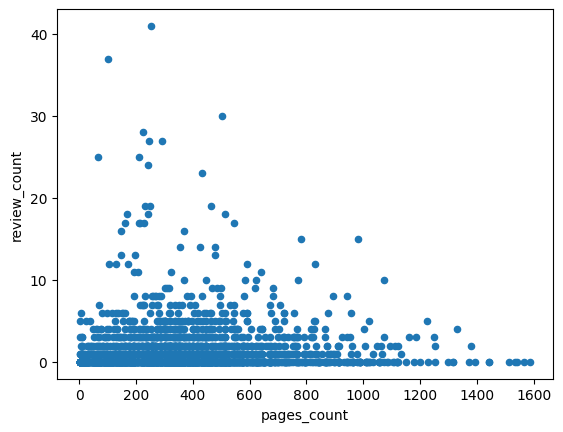

In [63]:
ax1 = df.plot.scatter(x='pages_count', y='review_count')
plt.show()


### 15. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

Как видно из графика, 2021 год является пиком числа написаных книг по программированию

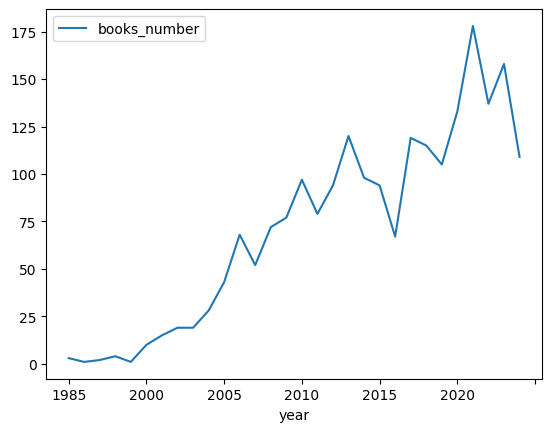

In [64]:
grouped = df.groupby('year').size().reset_index(name='books_number')
lines = grouped.plot.line(x='year', y='books_number')

### 16. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

1. График изменения количества отзывов из года в год

Как видно из графика, число отзывов в целом растет из года в год, хотя наблюдаются аномальные падения в 2021, 2023-2024 годах, что можно объяснить тем, что люди еще не успели прочитать книги и оставить отзывы + в 2024 году еще не выпущено максимальное число возможных книг, так что график к концу года может стабилизироваться

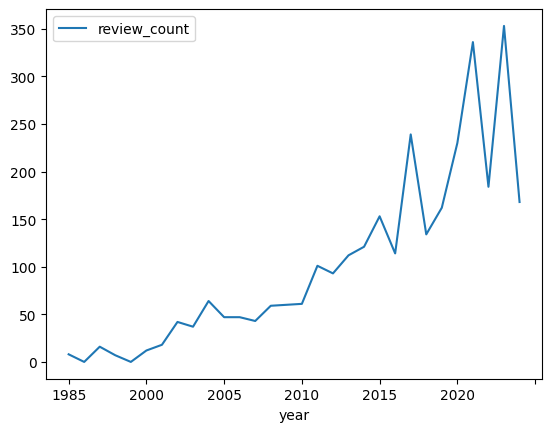

In [76]:
grouped_sum = df.groupby('year')['review_count'].sum().reset_index()
lines = grouped_sum.plot.line(x='year', y='review_count')


2. График изменения цены книги из года в год

Можно наблюдать плавный рост цены на книги из года в год + высокую цену на книги написанные до 2000 года

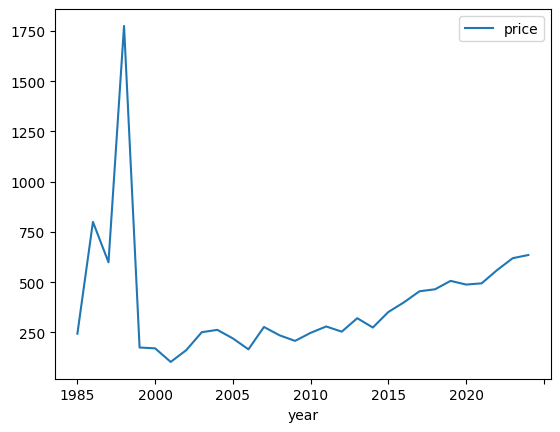

In [118]:
grouped_avg = df.groupby('year')['price'].mean().reset_index()
lines = grouped_avg.plot.line(x='year', y='price')

### 17. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

In [117]:
df_new = df.copy()

# we have list of authors, so we should explod it beforehands
df_new['authors'] = df_new['authors'].apply(literal_eval)
df_exploded = df_new.explode('authors').reset_index(drop=True)
df_exploded.rename(columns={'authors': 'author'}, inplace=True)

# creating 3 df and then merge them
grouped_authors_book_count = df_exploded.groupby('author').size().reset_index(name='books_number')
grouped_authors_rating = df_exploded.groupby('author')['rating'].mean().reset_index()
grouped_authors_review_count = df_exploded.groupby('author')['review_count'].mean().reset_index()

merged_book_count_rating = pd.merge(grouped_authors_book_count, grouped_authors_rating, how='inner', on='author')
merged_all = pd.merge(merged_book_count_rating, grouped_authors_review_count, how='inner', on='author')
merged_all


,author,books_number,rating,review_count
0,AGI Team Creative,4,0.00,0.0
1,Aahz Maruch,1,1.00,0.0
2,Aaron Saunders,1,1.00,0.0
3,Abhishek Mishra,1,5.00,0.0
4,Adam Cordeiro,1,0.00,0.0
...,...,...,...,...
2842,Янта Катупития,1,4.86,3.0
2843,Ярон Мински,1,5.00,2.0
2844,Ярослав Носек,1,0.00,0.0
2845,Яцек Галовиц,1,3.78,4.0



### 18. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

1. Можно проверить, число книг с названиями на русском языке. Как видно число книг с названием на русском языке превалирут
2. Сравним средний рейтинг книг с названиями на русском и не русском языках. Как видно, рейтинг книг с названием на русском языке выше

In [131]:
import re
def is_rus_name(row):
    if bool(re.search('[\u0400-\u04FF]', row['name'])):
        return 1
    return 0
df['is_rus_name'] = df.apply(is_rus_name, axis=1)
rus_books = df[df.is_rus_name == 1]
other_books = df[df.is_rus_name == 0]
print(f'Rus books amount: {len(rus_books)}')
print(f'Not Rus books amount: {len(other_books)}')

print(f'Rus books average rating: {rus_books.rating.mean()}')
print(f'Not Rus books average rating: {other_books.rating.mean()}')



Rus books amount: 2233
Not Rus books amount: 507
Rus books average rating: 2.6825078369905953
Not Rus books average rating: 0.8124063116370809
